# Shapefile editing for OpenET download
Then each shapefile is uploaded to Google Earth Engine to store as asset, asset ID can be used to fetch data at OpenET web server

In [30]:
import geopandas as gpd
import os 

# Load the shapefile into a GeoDataFrame
os.chdir("C:/Users/danli/OneDrive - University of North Carolina at Chapel Hill/github/CALFEWS")
shapefile_path = 'TransferGroupsCA/Folsom Dam & Canal/Folsom_Dam_n_Canal.shp'
# shapefile_path = "path/to/your/shapefile.shp"  # Replace with the path to your shapefile
gdf = gpd.read_file(shapefile_path)

# # Add a new column named 'ID' with values from 1 to n (number of features)
# gdf['id'] = range(1, len(gdf) + 1)

# # Save the updated GeoDataFrame to a new shapefile
# output_path = "TransferGroupsCA/Friant - Kern Canal/Friant_Kern_Canal.shp"  # Replace with the desired output path
# gdf.to_file(output_path)

# print(f"Updated shapefile saved at {output_path}")
gdf


,shpfl_nm,clfws_nm,id,geometry
0,El Dorado Irrigation District,NA,1,"MULTIPOLYGON (((-121.00234 38.70384, -121.0021..."
1,Roseville City Of,NA,2,"POLYGON ((-121.30072 38.80632, -121.30084 38.7..."
2,Sacramento County Water Agency,NA,3,"MULTIPOLYGON (((-121.15979 38.61112, -121.1537..."
3,San Juan Water District,NA,4,"MULTIPOLYGON (((-121.18045 38.77327, -121.1781..."
4,Placer County Water Agency,NA,5,"MULTIPOLYGON (((-121.09801 38.94204, -121.0979..."
5,East Bay Municipal Utility District,NA,6,"MULTIPOLYGON (((-122.27572 38.03619, -122.2757..."
6,Sacramento Municipal Utility District,NA,7,"POLYGON ((-121.12891 38.35077, -121.12079 38.3..."


In [20]:
# Load the shapefile into a GeoDataFrame
shapefile_path = 'TransferGroupsCA/Folsom Dam & Canal/Folsom Dam & Canal.shp'
gdf = gpd.read_file(shapefile_path)

# Add a new column named 'id' with values from 1 to n (number of features)
gdf['id'] = range(1, len(gdf) + 1)

# Split the GeoDataFrame into two based on the 'id' column
gdf_1_2 = gdf[gdf['id'].between(1, 2)]   # Features with 'id' from 1 to 2
gdf_3_4 = gdf[gdf['id'].between(3, 4)]      
gdf_5 = gdf[gdf['id']==5]  
gdf_6 = gdf[gdf['id']== 6] 
gdf_7 = gdf[gdf['id']>6]  
# # Save the new GeoDataFrames to separate shapefiles
output_path_1_2 = 'TransferGroupsCA/Folsom Dam & Canal/1/Folsom_Dam_Canal_12.shp'
output_path_3_4 = 'TransferGroupsCA/Folsom Dam & Canal/1/Folsom_Dam_Canal_34.shp'
output_path_5 = 'TransferGroupsCA/Folsom Dam & Canal/1/Folsom_Dam_Canal_5.shp'
output_path_6 = 'TransferGroupsCA/Folsom Dam & Canal/1/Folsom_Dam_Canal_6.shp'
output_path_7 = 'TransferGroupsCA/Folsom Dam & Canal/1/Folsom_Dam_Canal_7.shp'
# output_path_remaining = 'TransferGroupsCA/Folsom Dam & Canal/2/Folsom_Dam_Canal_2ndhalf.shp'

gdf_1_2.to_file(output_path_1_2)
gdf_3_4.to_file(output_path_3_4)
gdf_5.to_file(output_path_5)
gdf_6.to_file(output_path_6)
gdf_7.to_file(output_path_7)
# gdf_remaining.to_file(output_path_remaining)

print(f"Shapefiles saved: {output_path_1_2} ")


Shapefiles saved: TransferGroupsCA/Folsom Dam & Canal/1/Folsom_Dam_Canal_12.shp 


In [22]:
gdf_6

,shpfl_nm,clfws_nm,geometry,id
5,East Bay Municipal Utility District,NA,"MULTIPOLYGON (((-122.27572 38.03619, -122.2757...",6


In [1]:
import requests

# set your API key before making the request
header = {"Authorization": "xU7oPt7AKcQXViWHOY9lF97WWSM2UmasbkEZ7fb1s7O7aBJDygXkLNyR6Dvr"}

# endpoint arguments
args = {
  "date_range": [
    "2020-01-01",
    "2020-12-31"
  ],
  "interval": "monthly",
  "geometry": [
    -121.36322,
    38.87626
  ],
  "model": "Ensemble",
  "reducer": "mean",
  "variable": "ET",
  "reference_et": "gridMET",
  "units": "mm",
  "file_format": "JSON"
}

# query the api 
resp = requests.post(
    headers=header,
    json=args,
    url="https://openet-api.org/raster/timeseries/point"
)

print(resp.json())

[{'time': '2020-01-01', 'et': 27.0}, {'time': '2020-02-01', 'et': 58.0}, {'time': '2020-03-01', 'et': 70.0}, {'time': '2020-04-01', 'et': 110.0}, {'time': '2020-05-01', 'et': 69.0}, {'time': '2020-06-01', 'et': 25.0}, {'time': '2020-07-01', 'et': 13.0}, {'time': '2020-08-01', 'et': 22.0}, {'time': '2020-09-01', 'et': 22.0}, {'time': '2020-10-01', 'et': 7.0}, {'time': '2020-11-01', 'et': 17.0}, {'time': '2020-12-01', 'et': 21.0}]


In [4]:
import requests, os
import geopandas as gpd

API_KEY = "xU7oPt7AKcQXViWHOY9lF97WWSM2UmasbkEZ7fb1s7O7aBJDygXkLNyR6Dvr"
# Set your API key before making the request
header = {"Authorization": API_KEY}

# Load the shapefile
os.chdir("C:/Users/danli/OneDrive - University of North Carolina at Chapel Hill/github/CALFEWS")
shapefile_path = 'TransferGroupsCA/Yuba Water Authority/Yuba Water Authority.shp'

# shapefile_path = "path/to/your/shapefile.shp"
gdf = gpd.read_file(shapefile_path)

# Convert the shapefile to GeoJSON geometry
geometry = gdf.geometry.iloc[0]  # Assuming using the first geometry if multiple features
geometry_json = geometry.__geo_interface__
# geometry_json
# Endpoint arguments
args = {
    "date_range": [
        "2020-01-01",
        "2020-12-31"
    ],
    "interval": "monthly",
    "geometry": geometry_json,  # Pass the GeoJSON geometry here
    "model": "Ensemble",
    "reducer": "mean",
    "variable": "ET",
    "reference_et": "gridMET",
    "units": "mm",
    "file_format": "JSON"
}

# Query the API
resp = requests.post(
    headers=header,
    json=args,
    url="https://openet-api.org/raster/timeseries/geometry"
)

# Print response
print(resp.json())


{'detail': 'Not Found'}


# use the GEE directly

In [11]:
import ee
import pandas as pd
service_account = 'my-service-account@...gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, 'C:/Users/danli/OneDrive - University of North Carolina at Chapel Hill/github/CALFEWS/level-lyceum-404319-fda607794b85.json')
ee.Initialize(credentials)

# "C:\Users\danli\OneDrive - University of North Carolina at Chapel Hill\github\CALFEWS\level-lyceum-404319-fda607794b85.json"

In [4]:
# Define the location: downtown LA.
u_lon = -118.2437
u_lat =  34.0522
u_poi = ee.Geometry.Point(u_lon, u_lat)
# Load the ImageCollection
et = ee.ImageCollection('OpenET/ENSEMBLE/CONUS/GRIDMET/MONTHLY/v2_0').filterDate('2007-01-01', '2020-12-31')

# Select the variable of interest, for example 'et_ensemble_mad'
variable = 'et_ensemble_mad'


In [5]:
# the dataset use monthly sum ET as the variable, has a 30 meter * 30 meter resolution
scale = 30
monthly_et = et.getRegion(u_poi, scale).getInfo()
# monthly_et

In [6]:
# Convert to DataFrame

df = pd.DataFrame(monthly_et[1:], columns=monthly_et[0])

# Convert time from milliseconds since the epoch to datetime
df['time'] = pd.to_datetime(df['time'], unit='ms')

# Set the time column as the index of the DataFrame
df.set_index('time', inplace=True)
# df

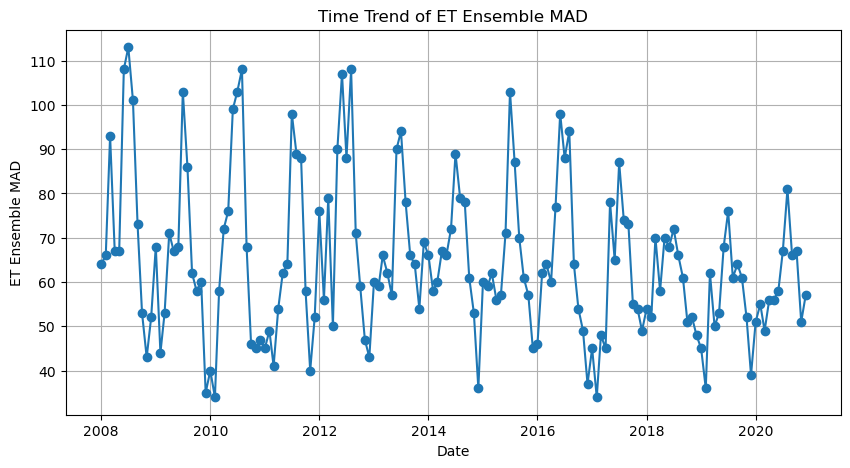

In [7]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size as needed
plt.plot(df.index, df['et_ensemble_mad'], marker='o', linestyle='-')  # Plot with markers and a line
plt.title('Time Trend of ET Ensemble MAD')
plt.xlabel('Date')
plt.ylabel('ET Ensemble MAD')
plt.grid(True)
plt.show()


# Fetching OpenET Ensemble Monthly Evapotranspiration over multipolygon 

In [58]:
# !pip install geemap

In [59]:
import ee
import geemap

In [61]:
python_code = """
asset_id = 'projects/level-lyceum-404319/assets/Folsom_Dam_n_Canal'
multi_polygon = ee.FeatureCollection(asset_id)

# Load the ImageCollection for the given date range.
et = ee.ImageCollection('OpenET/ENSEMBLE/CONUS/GRIDMET/MONTHLY/v2_0').filterDate('2008-01-01', '2023-12-31')
variable = 'et_ensemble_mad'
scale = 30  # Define resolution/ scale 
 """

js_code = geemap.js_snippet_to_py(python_code, add_new_cell=False, import_ee=False, import_geemap=False)
js_code

['import geemap\n',
 '\n',
 'Map = geemap.Map()\n',
 '\n',
 "asset_id = 'projects/level-lyceum-404319/assets/Folsom_Dam_n_Canal'\n",
 'multi_polygon = ee.FeatureCollection(asset_id)\n',
 '\n',
 '# Load the ImageCollection for the given date range.\n',
 "et = ee.ImageCollection('OpenET/ENSEMBLE/CONUS/GRIDMET/MONTHLY/v2_0').filterDate('2008-01-01', '2023-12-31')\n",
 "variable = 'et_ensemble_mad'\n",
 'scale = 30  # Define resolution/ scale\n',
 '\n',
 'Map']

In [47]:
import ee
import pandas as pd
import time

# Initialize the Earth Engine module.
# ee.Initialize()
service_account = 'earth-73@level-lyceum-404319.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, 'C:/Users/danli/OneDrive - University of North Carolina at Chapel Hill/github/CALFEWS/level-lyceum-404319-fda607794b85.json')
ee.Initialize(credentials)

# Load the asset (assuming it's a multi-polygon).
asset_id = 'projects/level-lyceum-404319/assets/Folsom_Dam_n_Canal'
multi_polygon = ee.FeatureCollection(asset_id)

# Load the ImageCollection for the given date range.
et = ee.ImageCollection('OpenET/ENSEMBLE/CONUS/GRIDMET/MONTHLY/v2_0').filterDate('2008-01-01', '2023-12-31')
variable = 'et_ensemble_mad'
scale = 30  # Define resolution/ scale 

In [48]:

# Calculate the sum over the multi-polygon for each image.
def reduce_image(image):
    return image.reduceRegion(
        reducer=ee.Reducer.sum(), 
        geometry=multi_polygon.geometry(),
        scale=scale,
        maxPixels=1e9
    ).get(variable)

# Map the function over the image collection
reduced_data = et.map(reduce_image)


In [20]:
df

,id,longitude,latitude,et_ensemble_mad,et_ensemble_mad_min,et_ensemble_mad_max,et_ensemble_mad_count,et_ensemble_mad_index,et_ensemble_sam
time,,,,,,,,,
2008-01-01,11s_20080101_20080131,-118.243579,34.052123,64,42,76,4,39,59
2008-02-01,11s_20080201_20080229,-118.243579,34.052123,66,42,81,5,47,66
2008-03-01,11s_20080301_20080331,-118.243579,34.052123,93,63,119,5,47,93
2008-04-01,11s_20080401_20080430,-118.243579,34.052123,67,43,83,4,43,76
2008-05-01,11s_20080501_20080531,-118.243579,34.052123,67,31,97,5,47,67
...,...,...,...,...,...,...,...,...,...
2020-08-01,11s_20200801_20200831,-118.243579,34.052123,81,54,129,4,43,92
2020-09-01,11s_20200901_20200930,-118.243579,34.052123,66,45,99,4,43,74
2020-10-01,11s_20201001_20201031,-118.243579,34.052123,67,61,71,4,39,59


In [49]:
# Fetch data (getInfo() could be very slow or fail for large data; use with caution)
# An alternative is to export the results to a CSV or Google Drive.
data_info = reduced_data.getInfo()

# Convert the results to a DataFrame
df = pd.DataFrame(data_info)

# Assuming each image has a time stamp, you may need to handle time separately
# For simplicity, this example does not include date handling
df


EEException: Error in map(ID=10s_20080601_20080630):
A mapped algorithm must return a Feature or Image.

In [50]:
def reduce_image(image):
    # Perform the reduction.
    reduced_value = image.reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=multi_polygon.geometry(),
        scale=scale,
        maxPixels=1e9,
        # tileScale= 16

    ).get(variable)
    
    # Return the result as a Feature with the reduced value and original image properties.
    return ee.Feature(None, {'reduced_sum': reduced_value, 'system:time_start': image.get('system:time_start')})

# Map the function over the image collection.
reduced_data = et.map(reduce_image)

# Export the FeatureCollection to a CSV file in Google Drive.
export_task = ee.batch.Export.table.toDrive(
    collection=reduced_data,
    description='ExportReducedData',
    folder='EarthEngineData',
    fileNamePrefix='reduced_data_summary',
    fileFormat='CSV'
)

# Start the export task.
export_task.start()
# Check the status of the export.
while export_task.active():
    print('Polling for task (id: {}).'.format(export_task.id))
    # time.sleep(30)  # Pause for 30 seconds before checking again.
print('Export task completed!')


Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id: N3KLYS4LT7FB6IU5DRHSZKJD).
Polling for task (id

In [52]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import io
from google.oauth2 import service_account

# Function to create the Google Drive service instance
def create_service():
    SCOPES = [
    'https://www.googleapis.com/auth/drive',
    ]
    SERVICE_ACCOUNT_FILE = 'C:/Users/danli/OneDrive - University of North Carolina at Chapel Hill/github/CALFEWS/level-lyceum-404319-fda607794b85.json'

    credentials = service_account.Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES)

    return build('drive', 'v3', credentials=credentials)

# Function to download a file from Google Drive using the file ID
def download_file(file_id, file_name):
    service = create_service()
    request = service.files().get_media(fileId=file_id)
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while not done:
        status, done = downloader.next_chunk()
        print(f"Download {int(status.progress() * 100)}%.")
    fh.seek(0)
    
    with open(file_name, 'wb') as f:
        f.write(fh.read())
    print("File downloaded successfully!")

# File ID and the name you want to save the file as locally
FILE_ID = 'N3KLYS4LT7FB6IU5DRHSZKJD'
FILE_NAME = 'reduced_data_summary.csv'

download_file(FILE_ID, FILE_NAME)



HttpError: <HttpError 404 when requesting https://www.googleapis.com/drive/v3/files/N3KLYS4LT7FB6IU5DRHSZKJD?alt=media returned "File not found: N3KLYS4LT7FB6IU5DRHSZKJD.". Details: "[{'message': 'File not found: N3KLYS4LT7FB6IU5DRHSZKJD.', 'domain': 'global', 'reason': 'notFound', 'location': 'fileId', 'locationType': 'parameter'}]">

In [54]:
import io

import google.auth
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from googleapiclient.http import MediaIoBaseDownload
SCOPES = ['https://www.googleapis.com/auth/drive']
KEY_FILE_LOCATION = 'C:/Users/danli/OneDrive - University of North Carolina at Chapel Hill/github/CALFEWS/level-lyceum-404319-fda607794b85.json'


def export_pdf(real_file_id):
  """Download a Document file in PDF format.
  Args:
      real_file_id : file ID of any workspace document format file
  Returns : IO object with location

  Load pre-authorized user credentials from the environment.
  TODO(developer) - See https://developers.google.com/identity
  for guides on implementing OAuth2 for the application.
  """
  # creds, _ = google.auth.default()

  try:
    # create drive api client
    credentials = ServiceAccountCredentials.from_json_keyfile_name(
      KEY_FILE_LOCATION, SCOPES)

    service = build("drive", "v3", credentials=credentials)

    file_id = 'N3KLYS4LT7FB6IU5DRHSZKJD'

    # pylint: disable=maybe-no-member
    request = service.files().export_media(
        fileId=file_id, 
        mimeType="application/csv"
    )
    file = io.BytesIO()
    downloader = MediaIoBaseDownload(file, request)
    done = False
    while done is False:
      status, done = downloader.next_chunk()
      print(f"Download {int(status.progress() * 100)}.")

  except HttpError as error:
    print(f"An error occurred: {error}")
    file = None

  return file.getvalue()


if __name__ == "__main__":
  export_pdf(real_file_id="N3KLYS4LT7FB6IU5DRHSZKJD")

An error occurred: <HttpError 404 when requesting https://www.googleapis.com/drive/v3/files/N3KLYS4LT7FB6IU5DRHSZKJD/export?mimeType=application%2Fcsv&alt=media returned "File not found: N3KLYS4LT7FB6IU5DRHSZKJD.". Details: "[{'message': 'File not found: N3KLYS4LT7FB6IU5DRHSZKJD.', 'domain': 'global', 'reason': 'notFound', 'location': 'fileId', 'locationType': 'parameter'}]">


AttributeError: 'NoneType' object has no attribute 'getvalue'